In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
 
import scipy.stats

%matplotlib inline

In [8]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
gapminder = pd.read_csv('gapminder.csv')

In [10]:
gdata = gapminder[gapminder.year==1985]

In [11]:
gdata.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
131,Albania,1985,Europe,2966799.0,72.71,94.570,3.23,4267.0,11.682409
212,Algeria,1985,Africa,22565908.0,67.18,92.880,5.98,11030.0,30.198494
293,Angola,1985,Africa,9745209.0,47.50,77.170,7.21,4117.0,11.271732
374,Antigua and Barbuda,1985,America,65744.0,72.13,96.946,2.09,11383.0,31.164956


In [12]:
size = 1e-6 * gdata.population
colors = gdata.region.map({'Africa':'skyblue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving', 'babies_per_woman', 
                       c=colors, s=size,linewidth=0.5, edgecolor='k', alpha=0.5)

In [13]:
def plotfit(fit):
    plotdata()
    plt.scatter(gdata.age5_surviving, grandmean.predict(gdata), 
               c=colors, s=30, linewidths=0.5, edgecolor='k', marker='D')

In [14]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()
surviving = smf.ols(formula = 'babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()
surviving_byregion = smf.ols('babies_per_woman ~ -1 + age5_surviving:region', data=gdata).fit()
surviving_byregion_population = smf.ols('babies_per_woman ~ -1 + age5_surviving:region + population', data=gdata).fit()


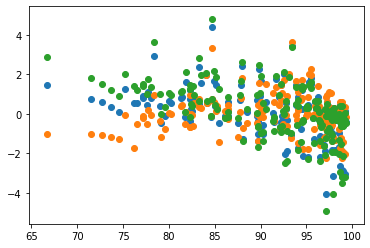

In [17]:
plt.scatter(gdata.age5_surviving, groupmeans.resid)
plt.scatter(gdata.age5_surviving, surviving.resid)
plt.scatter(gdata.age5_surviving, surviving_byregion_population.resid)

In [19]:
models = [groupmeans, surviving, surviving_byregion_population]
for model in models:
    print(model.mse_resid)

1.4979520263709156
0.9423025333008324
2.035212694341319


In [20]:
for model in models:
    print(model.rsquared)

0.6364676965596588
0.7726009080146058
0.9141145465308762


In [21]:
for model in models:
    print(model.fvalue)

103.88003937611684
150.34180603430977
376.77690039590334


In [23]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           8.26e-56
Time:                        11:42:53   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
sm.stats.anova_lm(groupmeans)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,655.512121,2.604302e-105
Residual,178.0,266.635461,1.497952,NaN,NaN
